[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/pinecone-io/examples/blob/master/learn/search/faiss-ebook/product-quantization/tuning-pq.ipynb) [![Open nbviewer](https://raw.githubusercontent.com/pinecone-io/examples/master/assets/nbviewer-shield.svg)](https://nbviewer.org/github/pinecone-io/examples/blob/master/learn/search/faiss-ebook/product-quantization/tuning-pq.ipynb)

# Tuning PQ

This notebook covers a few notes on tuning product quantization (PQ) parameters.

First we will look at memory usage and complexity of PQ vs standard k-means clustering.

In [7]:
def kmeans(k, D):
    return k * D

def pq(m, k, D):
    return k ** (1/m) * D

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

perf = pd.DataFrame({
    'test': [],
    'm': [],
    'k': [],
    'D': []
})

k = 2048
m = 8

for D in range(64, 2049, 64):
    perf = perf.append(pd.DataFrame({
        'test': ['kmeans', 'pq'],
        'm': [m, m],
        'k': [k, k],
        'D': [D, D],
        'complexity': [kmeans(k, D), pq(m, k, D)]
    }), ignore_index=True)

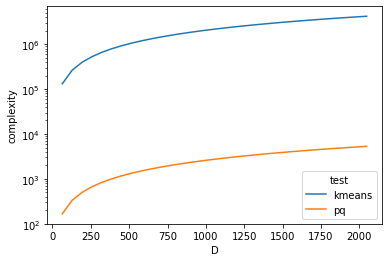

In [11]:
sns.lineplot(data=perf, x='D', y='complexity', hue='test')
plt.yscale('log')